**PSWD STRENGTH CHECKER**

Installing and Importing dependencies 

In [3]:
!pip install pandas

You should consider upgrading via the 'f:\coding\projects\infosec (pswd model)\.env\scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install seaborn

You should consider upgrading via the 'f:\coding\projects\infosec (pswd model)\.env\scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
!pip install matplotlib

You should consider upgrading via the 'f:\coding\projects\infosec (pswd model)\.env\scripts\python.exe -m pip install --upgrade pip' command.


In [10]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'f:\coding\projects\infosec (pswd model)\.env\scripts\python.exe -m pip install --upgrade pip' command.


In [43]:
!pip install xgboost

You should consider upgrading via the 'f:\coding\projects\infosec (pswd model)\.env\scripts\python.exe -m pip install --upgrade pip' command.


In [52]:
!pip install dill
!pip install pickle

You should consider upgrading via the 'f:\coding\projects\infosec (pswd model)\.env\scripts\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
You should consider upgrading via the 'f:\coding\projects\infosec (pswd model)\.env\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

Data Preparation

In [3]:
data = pd.read_csv('data.csv',on_bad_lines='skip')

In [4]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [5]:
data.tail()

,password,strength
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1
669639,fxx4pw4g,1


In [6]:
data.shape

(669640, 2)

In [7]:
data["strength"].unique()

array([1, 2, 0], dtype=int64)

In [8]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

password    0
strength    0
dtype: int64

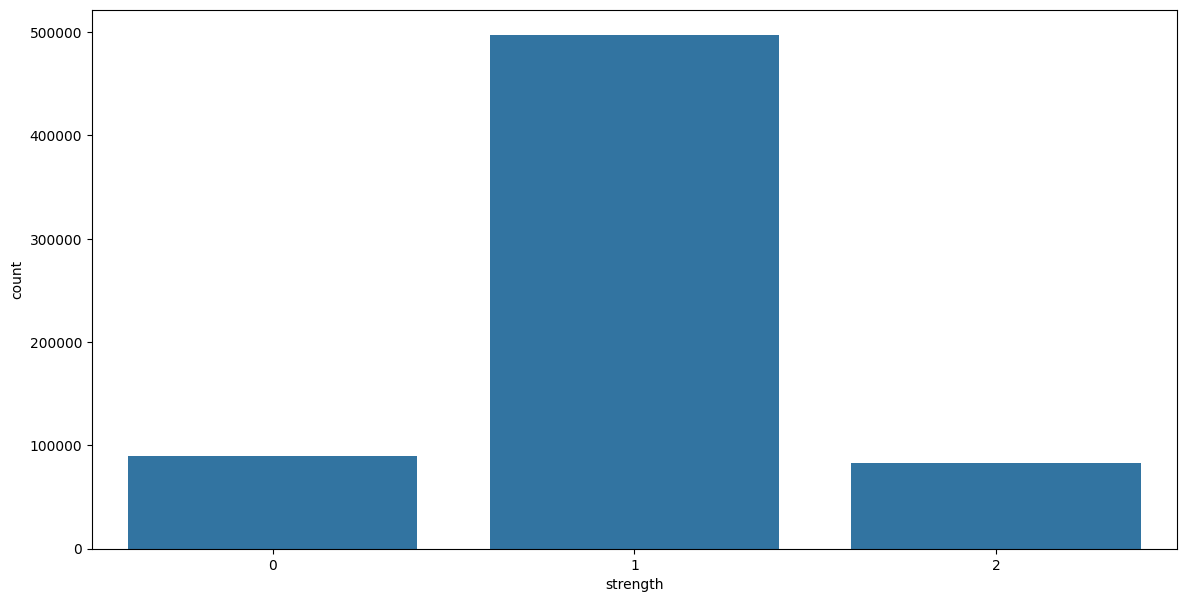

In [11]:
plt.figure(figsize=(14,7))
sns.countplot(x='strength', data=data)
plt.show()

In [12]:
pswd = np.array(data)
pswd

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [13]:
import random
random.shuffle(pswd)

In [14]:
X = [passwords[0] for passwords in pswd]
Y = [passwords[1] for passwords in pswd]

In [15]:
X

['kzde5577',
 'kzde5577',
 'kino3434',
 'visi7k1yr',
 'lamborghin1',
 'kzde5577',
 'AVYq1lDE4MgAZfNt',
 'kino3434',
 'universe2908',
 'visi7k1yr',
 'megzy123',
 '612035180tok',
 'visi7k1yr',
 'asv5o9yu',
 'jytifok873',
 'WUt9IZzE0OQ7PkNE',
 'v1118714',
 'WUt9IZzE0OQ7PkNE',
 'kzde5577',
 '6975038lp',
 'idofo673',
 'kino3434',
 'sbl571017',
 'g067057895',
 'kzde5577',
 'AVYq1lDE4MgAZfNt',
 '0169395484a',
 '612035180tok',
 'cigicigi123',
 '52558000aaa',
 'WUt9IZzE0OQ7PkNE',
 'lamborghin1',
 'megzy123',
 'lamborghin1',
 'gaymaids1',
 'gaymaids1',
 'idofo673',
 'intel1',
 '0169395484a',
 'kino3434',
 '6975038lp',
 'faranumar91',
 'klara-tershina3H',
 'faranumar91',
 'jytifok873',
 'cigicigi123',
 'asgaliu11',
 'elyass15@ajilent-ci',
 'TyWM72UNEex8Q8Y',
 'klara-tershina3H',
 '6975038lp',
 'TyWM72UNEex8Q8Y',
 'yitbos77',
 'fk9qi21m',
 'visi7k1yr',
 'asv5o9yu',
 'visi7k1yr',
 'yqugu927',
 'klara-tershina3H',
 'ejeko677',
 'schalke04',
 'pHyqueDIyNQ8vmhb',
 '6975038lp',
 'matiofox08',
 'visi7k1

In [16]:
def make_chars(inputs):
    characters = []
    for letter in inputs:
        characters.append(letter)
    return characters
make_chars('Manan')

['M', 'a', 'n', 'a', 'n']

In [17]:
vectorizer = TfidfVectorizer(tokenizer=make_chars)

In [18]:
X = vectorizer.fit_transform(X)

f:\coding\projects\infosec (pswd model)\.env\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [19]:
X.shape

(669639, 124)

In [20]:
vectorizer.get_feature_names_out()

array(['\x04', '\x05', '\x06', '\x0e', '\x10', '\x11', '\x16', '\x17',
       '\x19', '\x1b', '\x1c', '\x1e', ' ', '!', '"', '#', '$', '%', '&',
       '(', ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']',
       '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
       'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x81', '\x8d', '\xa0',
       '¡', '¤', '«', '°', '±', '³', '´', 'µ', '¶', '·', '¹', 'º', '¾',
       '¿', '×', 'ß', 'à', 'á', 'â', 'ä', 'å', 'æ', 'è', 'í', 'ï', 'ð',
       'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ù', 'ú', 'û', 'ü', 'ý', 'þ',
       'ÿ', '‡', '…'], dtype=object)

In [21]:
first = X[0].T.todense()

In [22]:
vec = pd.DataFrame(first,index=vectorizer.get_feature_names_out(), columns=['tfidf'])
vec

,tfidf
,0.0
,0.0
,0.0
,0.0
,0.0
...,...
ý,0.0
þ,0.0
ÿ,0.0
‡,0.0


In [23]:
vec.sort_values(by=['tfidf'],ascending=False)

,tfidf
7,0.591509
5,0.567135
z,0.336079
k,0.291582
d,0.285639
...,...
<,0.000000
;,0.000000
9,0.000000
8,0.000000


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=23)

In [25]:
X_train.shape, X_test.shape

((502229, 124), (167410, 124))

Model Training

In [26]:
import xgboost as xgb

In [27]:
xgb_classifier = xgb.XGBClassifier()


In [28]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [29]:
pred = xgb_classifier.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
confusion_matrix(y_test,pred)

array([[ 21403,   1028,      0],
       [   739, 123183,    189],
       [     4,    424,  20440]], dtype=int64)

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     22431
           1       0.99      0.99      0.99    124111
           2       0.99      0.98      0.99     20868

    accuracy                           0.99    167410
   macro avg       0.98      0.98      0.98    167410
weighted avg       0.99      0.99      0.99    167410



Saving and Predicting on Model

In [33]:
import dill
model_file = open("xgb_classifier.pkl", "wb")
dill.dump(xgb_classifier, model_file)
model_file.close()

In [34]:
dill.dump(vectorizer, open("vectorizer.pkl", "wb"))

In [35]:
temp_pswd = "manan@213871#$%^&*^$#"
temp_pswd = vectorizer.transform([temp_pswd])

In [36]:
xgb_classifier.predict(temp_pswd)

array([2], dtype=int64)

In [37]:
xgb_classifier.predict_proba(temp_pswd)[0]

array([1.9154346e-07, 4.6321133e-04, 9.9953663e-01], dtype=float32)